# 1. SVM #

### 1a. (5 points) Explain why can we set the margin c = 1 to derive the SVM formulation? ###

If you define un-normalized margin as picking 2 data points $x_1$ and $x_2$ on 2 dashed lines, where each line represents points that are closest to the decision boundary. And we get the un-normalized margin, $2c$ when we project this in the direction of $w$,

$w^T(x_1-x_2):= 2c$

this is a measure of how large the margin is. On the other hand, the actual margin, denoted as $\gamma \cdot \|w\| = 2c$

and this leaves us $\gamma = \frac{2c}{\|w\|}$

and we are maximizing this s.t. $y_i(w^Tx_i+b)\geq c, \forall i$

and the solutions to this optimazation task are insensitive to this scaler $c$ as this will scale $w$ and $b$ by $c$, as well as \|w\|, and these $c$ will cancel out, so we can set this value as 1.

_____________

### 1b. (10 points) Using Lagrangian dual formulation, show that the weight vector can be represented as ###

$w^* = \sum_{i=1}^n\alpha_iy_ix_i.$

### where $\alpha_i\geq0$ are the dual variables. What does this imply in terms of how to relate data to $w$? ###

###  1c. (10 points) Explain why only the data points on the “margin” will contribute to the sum above, i.e., playing a role in defining w ###

To optimize this constrained system, where $\theta = (w,b)$, and

the constraint from above $1-y_i(w^Tx_i+b) \leq 0$, and denote it as  $g_i(\theta)\leq 0$

we can optimize \$theta$ and $\alpha$ jointly, with the constraint set.

Then:

$g_i(\theta)\leq 0: \alpha_i = 0$

$g_i(\theta)\gt 0: \alpha_i \geq 0$

and any optimum of the original problem will be a saddle point to the Lagrangian.

And using KKT condition of $\alpha_i g_i(w) = 0$, we know that if we are at saddle point, then $\alpha$ cannot increase Lagrangian because its derivative is zero at that point, so $g_i=0$ or because it is self-constrained, such that $\alpha = 0$, so for any non-zero $\alpha_i$, it must be that the constraint is tight (aka points close to decision boundary). Thus the data points that do not lie on the "margin", do not contribute to the sum, as adding zero does not change the running sum.



______________________________________

### 1d. (20 points) Suppose we only have four training examples in two dimensions as shown in Fig. The positive samples at $x_1 = (0, 0)$, $x_2 = (2, 2)$ and negative samples at $x_3 = (h, 1)$ and $x_4 = (0, 3)$. ###

i. (10 points) For what range of parameter h > 0, the training points are still linearly separable?
- when $h > 0$ and $h < 1$, the training samples are still linearly separable.

ii. (10 points) Does the orientation of the maximum margin decision boundary change as h
changes, when the points are separable?
- Yes, since decision boundary in svm must contain support vectors, changing h between 0 and 1 (while still remaining linearly separable) does in fact change the orientation (both $w$ and $b$) of the maximum margin. In this example, when h approaches the upper bound of 1, the maximum margin will be the smallest.

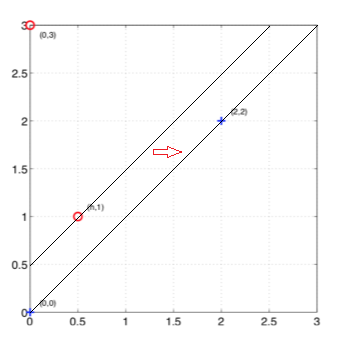

In [24]:
from IPython.display import Image
Image(filename=".\\pics\\svm1.png")

__________________________________________________

# 2. Multi-class classification for MNIST data set, comparison. (55 points.) #

This question is to compare different classifiers and their performance for multi-class classifications on the complete MNIST dataset at http://yann.lecun.com/exdb/mnist/. You can find the data 1 file mnist 10digits.mat in the homework folder. The MNIST database of handwritten digits has a training set of 60,000 examples, and a test set of 10,000 examples. We will compare KNN, logistic regression, SVM, kernel SVM, and neural networks. We suggest to use Scikit-learn, which is a commonly-used and powerful Python library with various machine learning tools. But you can also use other similar libraries in other programming languages of your choice to perform the tasks.

Train the classifiers on training dataset and evaluate on the test dataset.

### 2a. (50 points) Report confusion matrix, precision, recall, and F-1 score for each of the classifiers. For precision, recall, and F-1 score of each classifier, we will need to report these for each of the digits. So you can create a table for this. For this question, each of the 5 classifier, KNN, logistic regression, SVM, kernel SVM, and neural networks, accounts for 10 points. ###

In [47]:
import warnings
warnings.filterwarnings('ignore')

In [1]:
from scipy.io import loadmat
filename=".\\homework5\\mnist_10digits.mat"
digits = loadmat(filename)

In [2]:
digits

{'__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Tue Oct 13 20:00:03 2020',
 '__version__': '1.0',
 '__globals__': [],
 'xtrain': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'ytrain': array([[5, 0, 4, ..., 5, 6, 8]], dtype=int64),
 'xtest': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'ytest': array([[7, 2, 1, ..., 4, 5, 6]], dtype=int64)}

In [3]:
print(digits['xtrain'].shape)
print(digits['xtest'].shape)
print(digits['ytrain'].shape)
print(digits['ytest'].shape)

(60000, 784)
(10000, 784)
(1, 60000)
(1, 10000)


In [5]:
X_train = digits['xtrain']
X_test = digits['xtest']
y_train = digits['ytrain'].T.ravel()
y_test = digits['ytest'].T.ravel()

In [6]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 784)
(10000, 784)
(60000,)
(10000,)


In [7]:
#standarize the features
X_train = X_train/255
X_test = X_test/255


### Here I am random sampling 5000 images from the training sets for quick computations ###

In [14]:
from sklearn.utils import resample
X_train_sample, y_train_sample = resample(X_train, y_train, n_samples = 5000, random_state=0)

In [32]:
import numpy as np
import pandas as pd
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import sklearn.svm as svm
from sklearn.neural_network import MLPClassifier
from sklearn import metrics

In [79]:
#LR
method_name = 'Logistic_Regression'
clf = LogisticRegression()
clf.fit(X_train_sample, y_train_sample)

predictions = clf.predict(X_test)

cm = metrics.confusion_matrix(y_true=y_test, 
                         y_pred = predictions, 
                        labels = clf.classes_)

cr = metrics.classification_report(y_true=y_test, 
                         y_pred = predictions, 
                        labels = clf.classes_)

print(method_name,'\n')
print('Confusion matrix: \n')
print(cm,'\n')

print('Precision, Recall, and F-1 score: \n')
print(cr,'\n')

Logistic_Regression 

Confusion matrix: 

[[ 957    0    1    4    0    4    6    2    4    2]
 [   1 1108    4    1    0    4    4    2   11    0]
 [   9    9  883   27   12    6   15   15   48    8]
 [   7    2   22  889    0   33    3   12   28   14]
 [   2    4   12    2  903    0    6    1   10   42]
 [  13    5    6   42   16  731   23    8   38   10]
 [  14    2   10    1    7   19  899    2    4    0]
 [   3   10   21    6   12    2    0  928    7   39]
 [  13   13   14   34   12   35   18    7  821    7]
 [  13    7    5    8   54    9    0   18   20  875]] 

Precision, Recall, and F-1 score: 

              precision    recall  f1-score   support

           0       0.93      0.98      0.95       980
           1       0.96      0.98      0.97      1135
           2       0.90      0.86      0.88      1032
           3       0.88      0.88      0.88      1010
           4       0.89      0.92      0.90       982
           5       0.87      0.82      0.84       892
          

In [80]:
#KNN
method_name = 'KNN'
clf = KNeighborsClassifier(10)
clf.fit(X_train_sample, y_train_sample)

predictions = clf.predict(X_test)

cm = metrics.confusion_matrix(y_true=y_test, 
                         y_pred = predictions, 
                        labels = clf.classes_)

cr = metrics.classification_report(y_true=y_test, 
                         y_pred = predictions, 
                        labels = clf.classes_)

print(method_name,'\n')
print('Confusion matrix: \n')
print(cm,'\n')

print('Precision, Recall, and F-1 score: \n')
print(cr,'\n')

KNN 

Confusion matrix: 

[[ 969    1    1    0    1    2    5    1    0    0]
 [   0 1129    1    3    0    0    2    0    0    0]
 [  27   68  873    8    4    2    7   33    9    1]
 [   1    9    3  945    0   20    1   10   15    6]
 [   3   24    1    0  903    0    9    2    1   39]
 [   7   11    0   30    7  807   14    3    2   11]
 [  13    8    0    0    4    3  930    0    0    0]
 [   0   51    4    0    5    0    0  944    0   24]
 [  19   15    2   31   14   21    9    8  834   21]
 [   9   11    2    7   17    2    1   25    1  934]] 

Precision, Recall, and F-1 score: 

              precision    recall  f1-score   support

           0       0.92      0.99      0.96       980
           1       0.85      0.99      0.92      1135
           2       0.98      0.85      0.91      1032
           3       0.92      0.94      0.93      1010
           4       0.95      0.92      0.93       982
           5       0.94      0.90      0.92       892
           6       0.95   

In [81]:
#Linear SVM
method_name = 'Linear_SVM'
clf = svm.SVC(kernel='linear')
clf.fit(X_train_sample, y_train_sample)

predictions = clf.predict(X_test)

cm = metrics.confusion_matrix(y_true=y_test, 
                         y_pred = predictions, 
                        labels = clf.classes_)

cr = metrics.classification_report(y_true=y_test, 
                         y_pred = predictions, 
                        labels = clf.classes_)

print(method_name,'\n')
print('Confusion matrix: \n')
print(cm,'\n')

print('Precision, Recall, and F-1 score: \n')
print(cr,'\n')

Linear_SVM 

Confusion matrix: 

[[ 957    0    3    2    0    9    8    1    0    0]
 [   0 1123    3    2    1    2    3    0    1    0]
 [  12    5  948   20   10    1   11    7   16    2]
 [  11    2   24  894    0   28    1   11   25   14]
 [   2    2    6    1  928    2    4    8    2   27]
 [  14    6   13   44   13  760   12    1   22    7]
 [  18    2   16    2    6   15  899    0    0    0]
 [   2   13   21    5    8    1    0  939    8   31]
 [  11   17   23   50   14   30   15    7  799    8]
 [  10    6   10   15   60    4    0   21    8  875]] 

Precision, Recall, and F-1 score: 

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       980
           1       0.95      0.99      0.97      1135
           2       0.89      0.92      0.90      1032
           3       0.86      0.89      0.87      1010
           4       0.89      0.95      0.92       982
           5       0.89      0.85      0.87       892
           6       

In [82]:
#Kernal SVM
method_name = 'Kernal_SVM'
from scipy.spatial import distance
from sklearn.metrics.pairwise import euclidean_distances

#reduce the training set for the median trick
X_train_sample_kernal_svm_median_trick, y_train_sample_kernal_svm_median_trick = resample(X_train_sample, y_train_sample, n_samples = 1000, random_state=0)

#Median trick to find a good gamma
training_distances = euclidean_distances(X_train_sample_kernal_svm_median_trick,X_train_sample_kernal_svm_median_trick) #compute pair-wise euclidean distances of reduced training sample (1000)
M = np.median(training_distances) #compute median of the distances
sigma = np.sqrt(M/2)
gamma = 1/(np.power((2*sigma),2))

clf = svm.SVC(kernel='rbf',
             C = 1.0, 
             gamma = gamma)

clf.fit(X_train_sample, y_train_sample)

predictions = clf.predict(X_test)

cm = metrics.confusion_matrix(y_true=y_test, 
                         y_pred = predictions, 
                        labels = clf.classes_)

cr = metrics.classification_report(y_true=y_test, 
                         y_pred = predictions, 
                        labels = clf.classes_)

print(method_name,'\n')
print('Confusion matrix: \n')
print(cm,'\n')

print('Precision, Recall, and F-1 score: \n')
print(cr,'\n')

Kernal_SVM 

Confusion matrix: 

[[ 966    0    4    0    0    2    4    1    3    0]
 [   0 1116    6    4    0    1    3    0    4    1]
 [   7    0  984    5    6    0    2    8   20    0]
 [   0    0   14  953    0   15    0    8   16    4]
 [   1    0    6    0  949    0    8    0    3   15]
 [   3    0    8   18    1  847    7    1    5    2]
 [   7    1    8    0    4   11  926    0    1    0]
 [   1    7   25    0    6    0    0  967    4   18]
 [   4    0   15   15    5    7    3    4  917    4]
 [   8    6   16    8   27    5    0    6    9  924]] 

Precision, Recall, and F-1 score: 

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.98      0.99      1135
           2       0.91      0.95      0.93      1032
           3       0.95      0.94      0.95      1010
           4       0.95      0.97      0.96       982
           5       0.95      0.95      0.95       892
           6       

In [83]:
#NN
method_name = 'Neural_Nets'
clf = MLPClassifier(alpha=0.1, max_iter=1000, hidden_layer_sizes = (20, 10))
clf.fit(X_train_sample, y_train_sample)

predictions = clf.predict(X_test)

cm = metrics.confusion_matrix(y_true=y_test, 
                         y_pred = predictions, 
                        labels = clf.classes_)

cr = metrics.classification_report(y_true=y_test, 
                         y_pred = predictions, 
                        labels = clf.classes_)

print(method_name,'\n')
print('Confusion matrix: \n')
print(cm,'\n')

print('Precision, Recall, and F-1 score: \n')
print(cr,'\n')

Neural_Net 

Confusion matrix: 

[[ 948    0    8    1    3    8    5    2    3    2]
 [   0 1115    3    4    1    1    4    3    4    0]
 [   7    5  933   23    9    2   13   17   20    3]
 [   2    4   15  902    3   18    4   15   26   21]
 [   3    0   12    0  912    1    9    8    6   31]
 [   8    4    2   36   15  773   14    4   26   10]
 [  10    4   10    0   18   22  889    0    5    0]
 [   5    5   18    9    8    1    0  949   12   21]
 [   5    6    8   21    9   23   14    8  871    9]
 [   9    8    7    5   57   12    0   23   19  869]] 

Precision, Recall, and F-1 score: 

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       980
           1       0.97      0.98      0.98      1135
           2       0.92      0.90      0.91      1032
           3       0.90      0.89      0.90      1010
           4       0.88      0.93      0.90       982
           5       0.90      0.87      0.88       892
           6       

### 2b. (5 points) Comment on the performance of the classifier and give your explanation why some of them perform better than the others. ###

Seems like kernal SVM performed the best on test data. My initial expectation was that Neural Nets would perform the best, but it didn't. And I think this could be improved by hyper-parameter tuning or using something like grid-search to find optimal values to maximize the performance.

The fact that kernal SVM performed really well makese sense. Becasue compared to the linear version, rbf kernal lets the algorithm to draw a much more flexible decision boundaries involving curves (aka less linearly separable), it would perform very well with a task like digit recognitions, but obviously this cannot be used to make a general statement that kernal SVM always performs better than other algorithms, and the results will vary from dataset to dataset.

___________________________

# 3. Neural networks. (Bonus: 10 points) #

### 3a. (2 points) Consider a neural networks for a binary classification using sigmoid function for each unit. If the network has no hidden layer, explain why the model is equivalent to logistic regression. ###

The fact that sigmoid function is used in both logistic regression and NN (using sigmoid function) in classification setting to squeeze $\hat{y} = w^Tx+b$ into probablities (between 0~1). One property of logistic regression is that because the logistic cost function is convex, we are guaranteed to find the global minimum. However, when NN starts to involve $N$ hidden layers, we lose this convexity.

_______________